[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_truncated_tutorial.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# Truncated multivariate normals: a tutorial

This notebook shows how to use **Composed Multivariate Normal** distributions (CMNDs) when variables have **finite support** (e.g. $[0,1]$).

## Theoretical background

In real problems the domain of the variables is not infinite but bounded into a semi-finite region. 

If we start from the unbounded multivariate normal distribution:

$$
\mathcal{N}_k(\tilde U; \tilde \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^{k}\det \Sigma}} \exp\left[ -\frac{1}{2}(\tilde U - \tilde \mu)^{\rm T}\Sigma^{-1}(\tilde U - \tilde \mu) \right]
$$

Let $T\subset\{l,\dots,m\}$, where $l\leq k$ and $m\leq k$ be the set of indices of the truncated variables, and let $a_i<b_i$ be the truncation bounds for $i\in S$. Define the truncation region:

$$
A_S : \{\tilde U\in\mathbb{R}^k:\ a_i \le \tilde U_i \le b_i \ \ \forall\, i\in T \}
$$

with the remaining coordinates $i\notin T$ unbounded. The partially-truncated multivariate normal distribution is defined by

$$
\mathcal{TN}_T(\tilde U;\tilde\mu,\Sigma,\mathbf{a}_T,\mathbf{b}_T) = \frac{\mathcal{N}_k(\tilde U;\tilde\mu,\Sigma)\,\mathbf{1}_{A_T}(\tilde U)}{Z_ (\tilde\mu,\Sigma,\mathbf{a}_T,\mathbf{b}_T)},
$$

where $\mathbf{1}_{A_T}$ is the indicator function of $A_T$ and the normalization constant is

$$
Z_T(\tilde\mu,\Sigma,\mathbf{a}_T,\mathbf{b}_T)=
\int_{A_T}\mathcal{N}_k(\tilde T;\tilde\mu,\Sigma)\,d\tilde T
=
\mathbb{P}_{\tilde T\sim\mathcal{N}_k(\tilde\mu,\Sigma)}\left(\tilde T\in A_T\right).
$$


## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation


In [2]:
import multimin as mn
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

import warnings
warnings.filterwarnings("ignore")

figprefix = "truncated"

Welcome to MultiMin v0.9.5. ¡Al infinito y más allá!


## 1D distribution on a finite domain

Define a mixture of two Gaussians on the interval $[0, 1]$. Use the **domain** parameter: each variable can be `None` (unbounded) or `[low, high]`.

In [3]:
CMND_1d = mn.ComposedMultiVariateNormal(
    mus=[0.2, 0.8],
    weights=[0.5, 0.5],
    Sigmas=[0.01, 0.03],
    domain=[[0, 1]]  # variable 0 bounded to [0, 1]
    #domain=[None]  # variable 0 bounded to [0, 1]
)

The parameters are:

In [4]:
CMND_1d.tabulate()

,w,mu_1,sigma_1
component,,,
1,0.5,0.2,0.01
2,0.5,0.8,0.03


The function is:

In [5]:
function, cmmd = CMND_1d.get_function()

import numpy as np
from multimin import tnmd

def cmnd(X):

    a = 0.0
    b = 1.0

    mu1_1 = 0.2
    sigma1_1 = 0.01
    n1 = tnmd(X, mu1_1, sigma1_1, a, b)

    mu2_1 = 0.8
    sigma2_1 = 0.03
    n2 = tnmd(X, mu2_1, sigma2_1, a, b)

    w1 = 0.5
    w2 = 0.5

    return (
        w1*n1
        + w2*n2
    )


Sample and plot: all points lie in $[0, 1]$.

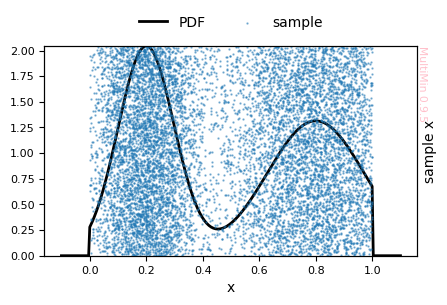

In [ ]:
# properties: list (e.g. ["x"]) or dict like DensityPlot (label and optional range per key)
G = CMND_1d.plot_sample(
    properties=["x"],
    sargs=dict(s=0.5, alpha=0.5),
    figsize=3,
)
plt.savefig(f"gallery/{figprefix}_1d_sample.png")

The PDF is zero outside the domain:

In [7]:
print("PDF at 0.5 (inside):", CMND_1d.pdf(np.array([[0.5]])))
print("PDF at -0.1 (outside):", CMND_1d.pdf(np.array([[-0.1]])))

PDF at 0.5 (inside): 0.3160530018742784
PDF at -0.1 (outside): 0.0


## Fitting 1D data on a finite domain

Generate data from the same distribution and fit with **FitCMND(..., domain=[[0, 1]])**. The fitter uses the domain in the likelihood and (by default) bounds the means to the domain.

In [8]:
np.random.seed(42)
data_1d = CMND_1d.rvs(5000)

F_1d = mn.FitCMND(ngauss=2, nvars=1, domain=[[0, 1]])
F_1d.fit_data(data_1d, advance=True)

Iterations:
Iter 0:
	Vars: [0.71, -0.71, 0.086, 0.92, -4.2, -4.2]
	LogL/N: 0.09798353864463324
Iter 1:
	Vars: [0.34, -0.33, 0.18, 0.83, -4.1, -4.1]
	LogL/N: -0.09827232137063303
Iter 2:
	Vars: [0.14, -0.13, 0.19, 0.8, -4.2, -4.1]
	LogL/N: -0.10607732066504681
Iter 3:
	Vars: [0.13, -0.13, 0.19, 0.8, -4.2, -4.1]
	LogL/N: -0.10736229299726742
Iter 4:
	Vars: [0.1, -0.098, 0.18, 0.78, -4.2, -4.2]
	LogL/N: -0.1121257326020949
Iter 5:
	Vars: [0.07, -0.068, 0.19, 0.77, -4.4, -4.2]
	LogL/N: -0.11964675232316427
Iter 6:
	Vars: [0.062, -0.06, 0.2, 0.77, -4.5, -4.2]
	LogL/N: -0.12459440227633245
Iter 7:
	Vars: [0.074, -0.072, 0.2, 0.78, -4.6, -4.2]
	LogL/N: -0.12691327043648248
Iter 8:
	Vars: [0.079, -0.076, 0.2, 0.78, -4.5, -4.2]
	LogL/N: -0.12747826628066156
Iter 9:
	Vars: [0.068, -0.066, 0.2, 0.78, -4.5, -4.2]
	LogL/N: -0.12776483554024398
Iter 10:
	Vars: [0.039, -0.037, 0.2, 0.78, -4.6, -4.1]
	LogL/N: -0.1286735453609069
Iter 11:
	Vars: [0.036, -0.033, 0.2, 0.78, -4.6, -4.1]
	LogL/N: -0.129153

In [9]:
F_1d.cmnd.tabulate(sort_by="weight")

,w,mu_1,sigma_1
component,,,
1,0.509835,0.199924,0.010318
2,0.490165,0.788830,0.028471


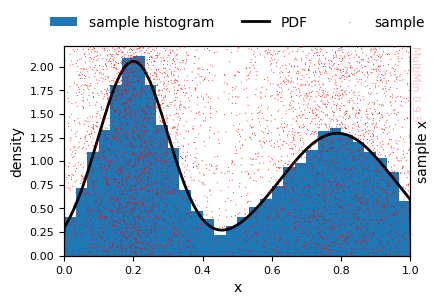

In [10]:
F_1d.plot_fit(
    properties=["x"],
    ranges=[[0, 1]],
    hargs=dict(bins=30, cmap="Spectral_r"),
    sargs=dict(s=0.5, edgecolor="None", color="r"),
    figsize=3,
)
plt.savefig(f"gallery/{figprefix}_1d_fit.png")

In [11]:
print("Fitted parameters:")
F_1d.cmnd.tabulate(sort_by="weight")

Fitted parameters:


,w,mu_1,sigma_1
component,,,
1,0.509835,0.199924,0.010318
2,0.490165,0.788830,0.028471


And the function:

In [12]:
function, cmnd = F_1d.cmnd.get_function()

import numpy as np
from multimin import tnmd

def cmnd(X):

    a = 0.0
    b = 1.0

    mu1_1 = 0.199924
    sigma1_1 = 0.010318
    n1 = tnmd(X, mu1_1, sigma1_1, a, b)

    mu2_1 = 0.78883
    sigma2_1 = 0.028471
    n2 = tnmd(X, mu2_1, sigma2_1, a, b)

    w1 = 0.509835
    w2 = 0.490165

    return (
        w1*n1
        + w2*n2
    )


## 3D distribution with one variable on a finite domain

Use **domain=[None, [0, 1], None]**: variables 0 and 2 are unbounded; variable 1 is bounded to $[0, 1]$.

In [13]:
weights = [0.5, 0.5]
mus = [[0.0, 0.3, 0.0], [0.0, 0.7, 0.0]]  # two bumps along the bounded variable (y)
sigmas = [[0.6, 0.15, 0.6], [0.6, 0.15, 0.6]]
Sigmas = [np.diag(s)**2 for s in sigmas]

CMND_3d = mn.ComposedMultiVariateNormal(
    mus=mus,
    weights=weights,
    Sigmas=Sigmas,
    domain=[None, [0, 1], None],  # only variable 1 in [0, 1]
)

Samples: the first and third coordinates are unbounded; the second coordinate lies in $[0, 1]$.

In [14]:
sample_3d = CMND_3d.rvs(3000)
print("Variable 1 (bounded) min/max:", sample_3d[:, 1].min(), sample_3d[:, 1].max())
print("All variable 1 in [0,1]:", np.all((sample_3d[:, 1] >= 0) & (sample_3d[:, 1] <= 1)))

Variable 1 (bounded) min/max: 2.0159534563357617e-06 0.9988410207612409
All variable 1 in [0,1]: True


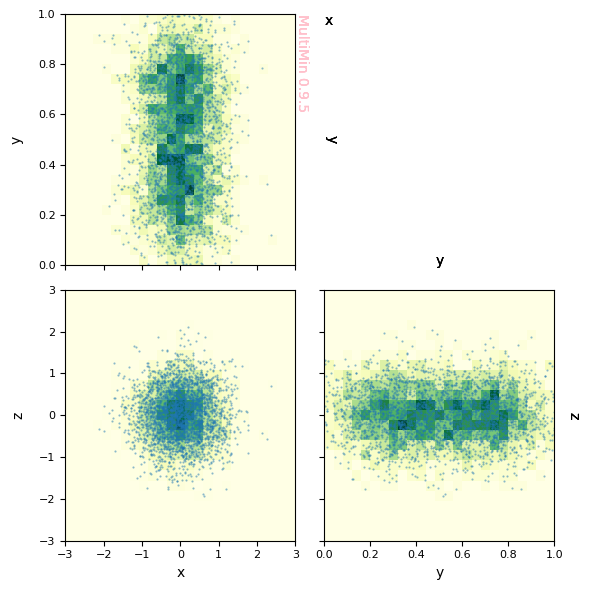

In [15]:
G3 = CMND_3d.plot_sample(
    data=sample_3d,
    properties=["x", "y", "z"],
    ranges=[[-3, 3], [0, 1], [-3, 3]],
    figsize=3,
    hargs=dict(bins=25, cmap="YlGn"),
    sargs=dict(s=0.3, alpha=0.5),
)
plt.tight_layout()
plt.savefig(f"gallery/{figprefix}_3d_sample.png")
plt.show()

## Fitting 3D data with a finite domain on one variable

Fit with `domain=[None, [0, 1], None]` so the likelihood and mean bounds respect the second variable’s domain.

In [16]:
np.random.seed(123)
data_3d = CMND_3d.rvs(5000)

F_3d = mn.FitCMND(ngauss=2, nvars=3, domain=[None, [0, 1], None])
F_3d.fit_data(data_3d, advance=True)

Iterations:
Iter 0:
	Vars: [-0.025, 0.025, 0.05, 0.12, 0.029, 0.64, 0.87, 0.65, -2.2, -4.4, -2.2, -2.2, -4.4, -2.2, 0.65, 1.3, 0.64, 0.9, 1.2, 0.89]
	LogL/N: 3.090209125307211
Iter 1:
	Vars: [0.0077, -0.0077, 0.63, 0.39, 0.64, 0.45, 0.63, 0.45, -2.2, -4.3, -2.2, -2.2, -4.3, -2.2, 1.2, 1, 1.2, 1.2, 1.1, 1.2]
	LogL/N: 2.714088213496122
Iter 2:
	Vars: [-0.012, 0.012, 0.28, 0.29, 0.27, 0.56, 0.76, 0.56, -2.2, -4.3, -2.2, -2.2, -4.3, -2.2, 0.88, 1.2, 0.87, 1, 1.1, 1]
	LogL/N: 2.2657326646516136
Iter 3:
	Vars: [-0.015, 0.015, 0.22, 0.3, 0.21, 0.57, 0.76, 0.57, -2.2, -4.3, -2.2, -2.2, -4.3, -2.2, 0.83, 1.2, 0.82, 0.97, 1.1, 0.97]
	LogL/N: 2.2413492875807686
Iter 4:
	Vars: [-0.022, 0.022, 0.064, 0.32, 0.042, 0.59, 0.77, 0.6, -2.3, -4.3, -2.2, -2.2, -4.3, -2.2, 0.67, 1.3, 0.66, 0.91, 1.2, 0.9]
	LogL/N: 2.200395166256543
Iter 5:
	Vars: [-0.023, 0.023, -0.022, 0.32, -0.051, 0.57, 0.76, 0.58, -2.3, -4.3, -2.3, -2.3, -4.3, -2.2, 0.58, 1.3, 0.57, 0.86, 1.2, 0.85]
	LogL/N: 2.158469338384725
Iter 6:
	

Iter 18:
	Vars: [0.095, -0.095, 0.12, 0.32, 0.11, -0.06, 0.7, -0.062, -2.8, -3.8, -2.8, -2.8, -3.8, -2.7, 0.33, -0.069, 0.3, 0.54, -0.017, 0.42]
	LogL/N: 1.7557584469235437
Iter 19:
	Vars: [0.095, -0.095, 0.084, 0.32, 0.066, -0.022, 0.71, 0.001, -2.7, -3.9, -2.7, -2.7, -3.9, -2.7, 0.16, 0.032, 0.16, 0.39, -0.015, 0.29]
	LogL/N: 1.7499553611436514
Iter 20:
	Vars: [0.096, -0.098, 0.044, 0.31, 0.019, 0.012, 0.71, 0.052, -2.7, -4, -2.7, -2.7, -4, -2.7, -0.0081, 0.1, 0.015, 0.23, -0.034, 0.16]
	LogL/N: 1.745656195498514
Iter 21:
	Vars: [0.1, -0.1, 0.032, 0.31, -0.0027, 0.014, 0.71, 0.062, -2.7, -4.1, -2.7, -2.7, -4.1, -2.7, -0.15, 0.12, -0.1, 0.098, -0.079, 0.041]
	LogL/N: 1.7427027866599718
Iter 22:
	Vars: [0.1, -0.1, 0.036, 0.29, -0.011, -0.012, 0.7, 0.034, -2.7, -4.1, -2.7, -2.8, -4.1, -2.7, -0.17, 0.099, -0.13, 0.063, -0.095, 0.0062]
	LogL/N: 1.7413360193407912
Iter 23:
	Vars: [0.1, -0.1, 0.038, 0.3, -0.0064, -0.0039, 0.71, 0.033, -2.7, -4.1, -2.8, -2.8, -4.1, -2.7, -0.17, 0.094, -0.12,

Iter 34:
	Vars: [0.079, -0.078, 0.04, 0.3, -0.00022, -0.0066, 0.71, 0.025, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.015, 0.0078, -0.0016, 0.069, 0.04, -0.0059]
	LogL/N: 1.7360154956762497
Iter 35:
	Vars: [0.079, -0.078, 0.039, 0.3, 7e-05, -0.0059, 0.71, 0.025, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.013, 0.0095, -0.003, 0.069, 0.039, -0.006]
	LogL/N: 1.7360129506156081
Iter 36:
	Vars: [0.078, -0.077, 0.039, 0.3, 0.00016, -0.0055, 0.71, 0.026, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.013, 0.011, -0.0046, 0.069, 0.04, -0.0072]
	LogL/N: 1.736009782544183
Iter 37:
	Vars: [0.074, -0.073, 0.039, 0.3, -0.00059, -0.0047, 0.71, 0.026, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.012, 0.014, -0.013, 0.066, 0.043, -0.015]
	LogL/N: 1.7359939856122935
Iter 38:
	Vars: [0.067, -0.066, 0.039, 0.3, -0.0011, -0.0038, 0.71, 0.028, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.018, 0.015, -0.021, 0.066, 0.051, -0.023]
	LogL/N: 1.7359850742509617
Iter 39:
	Vars: [0.064, -0.062, 0.039, 0.3, -0.0025, -0.0044, 0.71, 0.029, -2.7, -4

Iter 51:
	Vars: [0.012, -0.0061, 0.043, 0.3, -0.0043, -0.0087, 0.7, 0.028, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.043, 0.0098, -0.038, 0.087, 0.039, -0.037]
	LogL/N: 1.7359120156067707
Iter 52:
	Vars: [0.009, -0.0034, 0.044, 0.3, -0.0043, -0.0086, 0.7, 0.028, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.043, 0.011, -0.038, 0.087, 0.04, -0.037]
	LogL/N: 1.7359104151274445
Iter 53:
	Vars: [0.0031, 0.0027, 0.044, 0.29, -0.0044, -0.0082, 0.7, 0.028, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.044, 0.013, -0.038, 0.087, 0.041, -0.037]
	LogL/N: 1.7359067489297952
Iter 54:
	Vars: [-0.0061, 0.012, 0.044, 0.29, -0.0042, -0.0076, 0.7, 0.028, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.044, 0.016, -0.037, 0.087, 0.04, -0.034]
	LogL/N: 1.7359014492355545
Iter 55:
	Vars: [-0.016, 0.023, 0.044, 0.29, -0.0036, -0.0073, 0.7, 0.028, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.042, 0.019, -0.034, 0.084, 0.039, -0.031]
	LogL/N: 1.7358950252091476
Iter 56:
	Vars: [-0.033, 0.041, 0.043, 0.29, -0.0045, -0.0056, 0.7, 0.027, -2.7, -4.

Iter 68:
	Vars: [-0.038, 0.045, 0.042, 0.29, -0.0028, -0.0055, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.03, 0.012, -0.027, 0.067, 0.038, -0.022]
	LogL/N: 1.735879779334413
Iter 69:
	Vars: [-0.039, 0.047, 0.042, 0.29, -0.0025, -0.0056, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.03, 0.012, -0.026, 0.067, 0.038, -0.022]
	LogL/N: 1.7358797592819792
Iter 70:
	Vars: [-0.039, 0.046, 0.042, 0.29, -0.0026, -0.0055, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.03, 0.012, -0.026, 0.067, 0.038, -0.022]
	LogL/N: 1.735879729083433
Iter 71:
	Vars: [-0.038, 0.046, 0.042, 0.29, -0.0027, -0.0055, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.03, 0.012, -0.027, 0.067, 0.038, -0.022]
	LogL/N: 1.735879716935032
Iter 72:
	Vars: [-0.038, 0.046, 0.042, 0.29, -0.0027, -0.0055, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.031, 0.012, -0.027, 0.067, 0.038, -0.022]
	LogL/N: 1.7358797094280296
Iter 73:
	Vars: [-0.038, 0.046, 0.042, 0.29, -0.0027, -0.0056, 0.7, 0.027, -2.7, -4.2, -2.8,

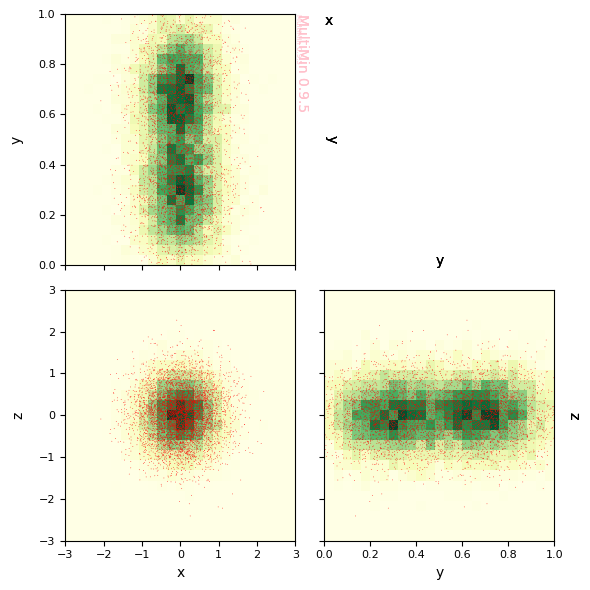

In [17]:
F_3d.plot_fit(
    properties=["x", "y", "z"],
    ranges=[[-3, 3], [0, 1], [-3, 3]],
    hargs=dict(bins=25, cmap="YlGn"),
    sargs=dict(s=0.3, edgecolor="None", color="r"),
    figsize=3,
)
plt.tight_layout()
plt.savefig(f"gallery/{figprefix}_3d_fit.png")
plt.show()

In [18]:
CMND_3d.tabulate(sort_by="distance")

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.5,0.0,0.3,0.0,0.6,0.15,0.6,0.0,0.0,0.0
2,0.5,0.0,0.7,0.0,0.6,0.15,0.6,0.0,0.0,0.0


In [19]:
print("Fitted parameters (note variable 2 = y in [0,1]):")
F_3d.cmnd.tabulate(sort_by="distance")

Fitted parameters (note variable 2 = y in [0,1]):


,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.489483,0.042107,0.291273,-0.002683,0.605634,0.150462,0.595911,0.015334,0.005947,-0.013232
2,0.510517,-0.005567,0.699541,0.026599,0.591060,0.151045,0.610340,0.033765,0.018966,-0.011006


And the function is:

In [20]:
function, cmnd = F_3d.cmnd.get_function()

import numpy as np
from multimin import tnmd

def cmnd(X):

    a = [-np.inf, 0.0, -np.inf]
    b = [np.inf, 1.0, np.inf]

    mu1_1 = 0.042107
    mu1_2 = 0.291273
    mu1_3 = -0.002683
    mu1 = [mu1_1, mu1_2, mu1_3]
    Sigma1 = [[0.366793, 0.001397, 0.002146], [0.001397, 0.022639, -0.001186], [0.002146, -0.001186, 0.35511]]
    Z1 = 0.973556
    n1 = tnmd(X, mu1, Sigma1, a, b, Z=Z1)

    mu2_1 = -0.005567
    mu2_2 = 0.699541
    mu2_3 = 0.026599
    mu2 = [mu2_1, mu2_2, mu2_3]
    Sigma2 = [[0.349352, 0.003014, 0.006842], [0.003014, 0.022814, -0.001015], [0.006842, -0.001015, 0.372515]]
    Z2 = 0.976659
    n2 = tnmd(X, mu2, Sigma2, a, b, Z=Z2)

    w1 = 0.489483
    w2 = 0.510517

    return (
        w1*n1
        + w2*n2
    )


In [21]:
X = np.array([[0.0, 0.3, 1.2]])
cmnd(X), F_3d.cmnd.pdf(X)

(0.07924403128099507, 0.07924435896152117)

And in LaTeX:

In [22]:
function, _ = F_3d.cmnd.get_function(type="latex")
display(Markdown(function))

Finite domain. The following variables are truncated (the rest are unbounded):

- Variable $x_{2}$ (index 2): domain $[0.0, 1.0]$.

Truncation region: $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$, with $T$ the set of truncated indices.

$$f(\mathbf{x}) = w_1 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1, \mathbf{a}_T, \mathbf{b}_T) + w_2 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2, \mathbf{a}_T, \mathbf{b}_T)$$

where

Bounds (vectors): $\mathbf{a}_T = (-\infty, 0.0, -\infty)^\top$, $\mathbf{b}_T = (\infty, 1.0, \infty)^\top$.

$$w_1 = 0.489483$$
$$\boldsymbol{\mu}_1 = \left( \begin{array}{c} 0.042107 \\ 0.291273 \\ -0.002683 \end{array}\right)$$
$$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc} 0.366793 & 0.001397 & 0.002146 \\ 0.001397 & 0.022639 & -0.001186 \\ 0.002146 & -0.001186 & 0.35511 \end{array}\right)$$

$$w_2 = 0.510517$$
$$\boldsymbol{\mu}_2 = \left( \begin{array}{c} -0.005567 \\ 0.699541

Finite domain. The following variables are truncated (the rest are unbounded):

- Variable $x_{2}$ (index 2): domain $[0.0, 1.0]$.

Truncation region: $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$, with $T$ the set of truncated indices.

$$f(\mathbf{x}) = w_1 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1, \mathbf{a}_T, \mathbf{b}_T) + w_2 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2, \mathbf{a}_T, \mathbf{b}_T)$$

where

Bounds (vectors): $\mathbf{a}_T = (-\infty, 0.0, -\infty)^\top$, $\mathbf{b}_T = (\infty, 1.0, \infty)^\top$.

$$w_1 = 0.489483$$
$$\boldsymbol{\mu}_1 = \left( \begin{array}{c} 0.042107 \\ 0.291273 \\ -0.002683 \end{array}\right)$$
$$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc} 0.366793 & 0.001397 & 0.002146 \\ 0.001397 & 0.022639 & -0.001186 \\ 0.002146 & -0.001186 & 0.35511 \end{array}\right)$$

$$w_2 = 0.510517$$
$$\boldsymbol{\mu}_2 = \left( \begin{array}{c} -0.005567 \\ 0.699541 \\ 0.026599 \end{array}\right)$$
$$\mathbf{\Sigma}_2 = \left( \begin{array}{ccc} 0.349352 & 0.003014 & 0.006842 \\ 0.003014 & 0.022814 & -0.001015 \\ 0.006842 & -0.001015 & 0.372515 \end{array}\right)$$

Truncated normal. The unbounded normal is

$$\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^{{k}} \det \mathbf{\Sigma}}} \exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\top} \mathbf{\Sigma}^{{-1}} (\mathbf{x}-\boldsymbol{\mu})\right].$$

The truncation region is $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$. The partially truncated normal is

$$\mathcal{TN}_T(\tilde{U}; \tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \frac{\mathcal{N}(\tilde{U}; \tilde{\mu}, \Sigma) \, \mathbf{1}_{A_T}(\tilde{U})}{Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T)},$$

where $\mathbf{1}_{A_T}$ is the indicator of $A_T$ and the normalization constant is

$$Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \int_{A_T} \mathcal{N}(\tilde{T}; \tilde{\mu}, \Sigma) \, d\tilde{T} = \mathbb{P}_{\tilde{T} \sim \mathcal{N}(\tilde{\mu},\Sigma)}(\tilde{T} \in A_T).$$

Finite domain. The following variables are truncated (the rest are unbounded):

- Variable $x_2$ (index 2): domain $[0.0, 1.0]$.

Truncation region: $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$, with $T$ the set of truncated indices.

$$f(\mathbf{x}) = w_1 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1, \mathbf{a}_T, \mathbf{b}_T) + w_2 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2, \mathbf{a}_T, \mathbf{b}_T)$$

where

Bounds (vectors): $\mathbf{a}_T = (-\infty, 0.0, -\infty)^\top$, $\mathbf{b}_T = (\infty, 1.0, \infty)^\top$.

$$w_1 = 0.489088$$
$$\boldsymbol{\mu}_1 = \left( \begin{array}{c} 0.042197 \\ 0.291123 \\ -0.00285 \end{array}\right)$$
$$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc} 0.366817 & 0.001419 & 0.00217 \\ 0.001419 & 0.022609 & -0.00123 \\ 0.00217 & -0.00123 & 0.355096 \end{array}\right)$$

$$w_2 = 0.510912$$
$$\boldsymbol{\mu}_2 = \left( \begin{array}{c} -0.005599 \\ 0.699398 \\ 0.026692 \end{array}\right)$$
$$\mathbf{\Sigma}_2 = \left( \begin{array}{ccc} 0.349353 & 0.003032 & 0.006884 \\ 0.003032 & 0.022845 & -0.001046 \\ 0.006884 & -0.001046 & 0.37253 \end{array}\right)$$

Truncated normal. The unbounded normal is

$$\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^{{k}} \det \mathbf{\Sigma}}} \exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\top} \mathbf{\Sigma}^{{-1}} (\mathbf{x}-\boldsymbol{\mu})\right].$$

The truncation region is $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$. The partially truncated normal is

$$\mathcal{TN}_T(\tilde{U}; \tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \frac{\mathcal{N}(\tilde{U}; \tilde{\mu}, \Sigma) \, \mathbf{1}_{A_T}(\tilde{U})}{Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T)},$$

where $\mathbf{1}_{A_T}$ is the indicator of $A_T$ and the normalization constant is

$$Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \int_{A_T} \mathcal{N}(\tilde{T}; \tilde{\mu}, \Sigma) \, d\tilde{T} = \mathbb{P}_{\tilde{T} \sim \mathcal{N}(\tilde{\mu},\Sigma)}(\tilde{T} \in A_T).$$

---
**MultiMin** – Multivariate Gaussian fitting with finite domains  
© 2026 Jorge I. Zuluaga